In [34]:
# reading and understanding the data
# training the model
# residual analysis
# testing the model - predicting and evaluating the model on test set

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [12]:
# reading data
adv = pd.read_csv("./advertising.csv")

In [13]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
adv.shape

(200, 4)

In [15]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


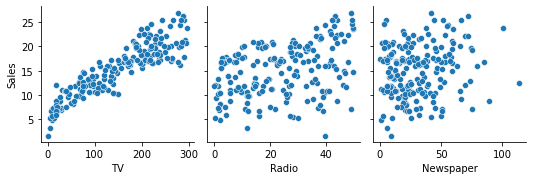

In [17]:
# visualize data

sns.pairplot(data=adv, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'])


In [18]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

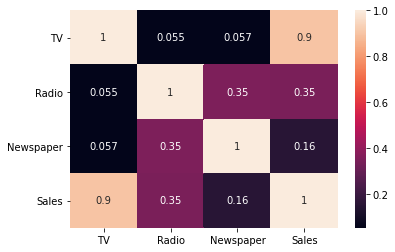

In [19]:
sns.heatmap(adv.corr(), annot=True)

Steps: 
- create X and y
- create train and test data sets (eg: ratios as 70-30, 80-20)
- Train your model on training set (i.e., learn the coefficients)
- Evaluate the model (training set, test set)

In [20]:
# create x and y
X = adv.TV
y = adv.Sales

In [21]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70, random_state=100)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(140,)
(60,)
(140,)
(60,)


In [23]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [24]:
# training the model
X_train_sm = sm.add_constant(X_train)

In [25]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [26]:
# y = c + m1.x1
# y = c.const + m1.TV
# fitting the model
# OLS - ordinary least squares
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [28]:
# Sales  = 6.94 + 0.054546 * TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.52e-52
Time:                        21:14:41   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# 1. co-eff and p-value
# 2. R-squared is 81.6% very high
# 3. p(F-statistic)  is low => the fit is not by chance

In [36]:
# y_train_pred= 6.9487 + 0.054*X_train
y_train_pred = lr_model.predict(X_train_sm)

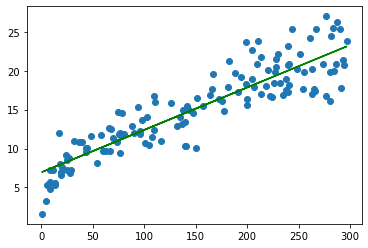

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred,'g')
plt.show()

### Residual Analysis

In [38]:
# error = f(y_train, y_train_pred)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

In [40]:
# residuals will be the diff bet original and predicted values
res = y_train-y_train_pred

C:\Tools\Anaconda3\envs\work\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


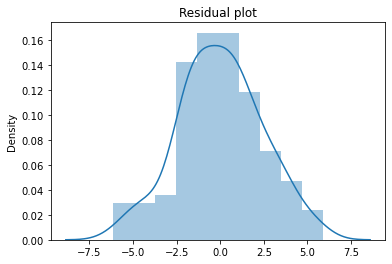

In [44]:
# plot th residuals
plt.figure()
sns.distplot(res)
plt.title('Residual plot')
plt.show()

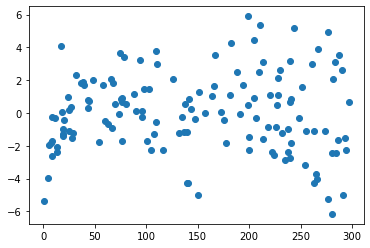

In [46]:
# look for patterns in residuals and we shouldn't be able to identify patterns
plt.scatter(X_train, res)
plt.show()

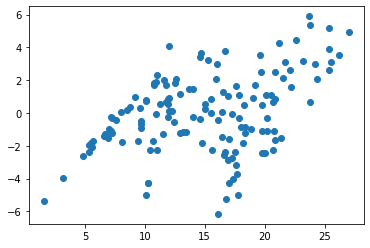

In [47]:
plt.scatter(y_train, res)
plt.show()

### Predicting test set

In [48]:
# y_test_pred
# evaluate the model, r-squared  on the test

In [52]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [54]:
# r-squared
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [55]:
# r2 on train
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.8157933136480389

In [56]:
# mean squared error
m2 = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
m2

4.077556371826956

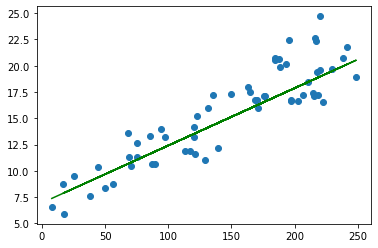

In [57]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred,'g')
plt.show()

# Linear Regression using sklearn

In [58]:
# train test split
X_train ,X_test, y_train, y_test = train_test_split(X,y,train_size=0.70, random_state=100)

In [64]:
# reshape to 2D

X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)
y_train_lm = y_train.values.reshape(-1, 1)
y_test_lm = y_test.values.reshape(-1, 1)

In [67]:
# steps in sklearn

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model (takes 2D arrays)
lm.fit(X_train_lm, y_train)


LinearRegression()

In [68]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [69]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [70]:
# 3. see the params, make predictions (train, test)
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)


In [71]:
# 4. evaluate (r2, etc.)
r2_train_lm = r2_score(y_true=y_train, y_pred=y_train_pred)
print(r2_train_lm)

r2_test_lm = r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2_test_lm)

0.8157933136480389
0.7921031601245662
